In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Data preprocessing

# Importing the dataset

In [2]:
df = pd.read_csv("data (1).csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
df.shape

(569, 33)

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
x = df.drop("diagnosis", axis = 1)
y = df["diagnosis"]

# Encoding categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the ANN

In [13]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the ANN

In [14]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model = ann.fit(X_train, y_train, batch_size = 32, epochs = 200)
model

Epoch 1/200
15/15 [==============================] - 1s 2ms/step - loss: 0.5175 - accuracy: 0.7636
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8993
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.9406
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.9387
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.9582
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9412
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9580
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9486
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9528
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.1541 - accuracy: 0.9401
Epoch 11/

15/15 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.9944
Epoch 84/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9913
Epoch 85/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9936
Epoch 86/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9862
Epoch 87/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9950
Epoch 88/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9905
Epoch 89/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9921
Epoch 90/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9906
Epoch 91/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9941
Epoch 92/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9981
Epoch 93/200


15/15 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9991
Epoch 165/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9993
Epoch 166/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 167/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9978
Epoch 168/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9974
Epoch 169/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9953
Epoch 170/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9991
Epoch 171/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9963
Epoch 172/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9934
Epoch 173/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9989
Epoc

In [15]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


# Predicting the Train set results

In [16]:
y_pred = ann.predict(X_train)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix for train set

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[285   0]
 [  1 169]]


0.9978021978021978

# Predicting the Test set results

In [18]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix for train set

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[72  0]
 [ 2 40]]


0.9824561403508771

In [20]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

False Positives
 [2 0]
False Negetives
 [0 2]
True Positives
 [72 40]
True Negetives
 [40 72]
Sensitivity 
 [1.         0.95238095]
Specificity 
 [0.95238095 1.        ]
Precision 
 [0.97297297 1.        ]
Recall 
 [1.         0.95238095]
Áccuracy 
[0.98245614 0.98245614]
FScore 
[0.98630137 0.97560976]


In [21]:
training_loss = model.history['loss']

In [22]:
epoch_count = range(1, len(training_loss) + 1)

# plot of the loss vs. epochs

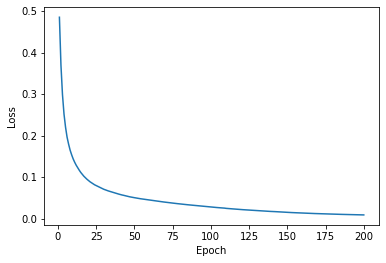

In [23]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, training_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();